# Unit 5 - Financial Planning

In [38]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [39]:
# Load .env enviroment variables
load_dotenv()

True

In [40]:
# Format current date as ISO format
today = pd.Timestamp("2022-06-12", tz="America/New_York").isoformat()

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [41]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3



# YOUR CODE HERE!

In [42]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [43]:
# BTC  and ETH Response Data execute get request and store as a variable and display data

btc_response_data = requests.get(btc_url)
btc_response_content = btc_response_data.content
print(btc_response_content)
eth_response_data = requests.get(eth_url)
eth_response_content = eth_response_data.content
print(eth_response_content) 

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 19078437,\n\t\t\t"total_supply": 19078437,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 21301.0000000000000000,\n\t\t\t\t\t"volume_24h": 16384887532,\n\t\t\t\t\t"market_cap": 406640894320,\n\t\t\t\t\t"percentage_change_1h": -0.3001368485693890,\n\t\t\t\t\t"percentage_change_24h": -1.8437824239682200,\n\t\t\t\t\t"percentage_change_7d": 3.8246648513121000,\n\t\t\t\t\t"percent_change_1h": -0.3001368485693890,\n\t\t\t\t\t"percent_change_24h": -1.8437824239682200,\n\t\t\t\t\t"percent_change_7d": 3.8246648513121000\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 27482.5502,\n\t\t\t\t\t"volume_24h": 21139781893.7864,\n\t\t\t\t\t"market_cap": 524648081851.664,\n\t\t\t\t\t"percent_change_1h": -0.3001368485693890,\n\t\t\t\t\t"percent_change_24h": -1.8437824239682200,\n\t\t\t\t\t

In [44]:
# change to json and add indents to json and to output to BTC_data
btc_data = btc_response_data.json()
print(json.dumps(btc_data, indent=4))


{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19078437,
            "total_supply": 19078437,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 21301.0,
                    "volume_24h": 16384887532,
                    "market_cap": 406640894320,
                    "percentage_change_1h": -0.300136848569389,
                    "percentage_change_24h": -1.84378242396822,
                    "percentage_change_7d": 3.8246648513121,
                    "percent_change_1h": -0.300136848569389,
                    "percent_change_24h": -1.84378242396822,
                    "percent_change_7d": 3.8246648513121
                },
                "CAD": {
                    "price": 27482.5502,
                    "volume_24h": 21139781893.7864,
                    "

In [45]:
# change to json and add indents to json and to output to Eth_data

eth_data = eth_response_data.json()
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 121320490,
            "total_supply": 121320490,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1221.5,
                    "volume_24h": 11729238547,
                    "market_cap": 148262529979,
                    "percentage_change_1h": -0.758762779380706,
                    "percentage_change_24h": -3.6732729951591,
                    "percentage_change_7d": 8.50493982698659,
                    "percent_change_1h": -0.758762779380706,
                    "percent_change_24h": -3.6732729951591,
                    "percent_change_7d": 8.50493982698659
                },
                "CAD": {
                    "price": 1575.9793,
                    "volume_24h": 15133063573.3394,
                    

In [46]:
# Fetch current BTC price
btc_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]


# Fetch current ETH price

eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
print(f'BTC Price : {btc_price}')
print(f'ETH Price : {eth_price}')

my_btc_value = (my_btc*btc_price)
my_eth_value = (my_eth*eth_price)
current_crypto_value = (my_btc_value + my_eth_value)



# YOUR CODE HERE!

# Print current crypto wallet balance
print(f'The current value of your {my_btc} BTC is ${my_btc_value}')
print(f'The current value of your {my_eth} ETH is ${my_eth_value}')
print(f'Current Crypto value: {current_crypto_value}')

BTC Price : 27482.5502
ETH Price : 1575.9793
The current value of your 1.2 BTC is $32979.06024
The current value of your 5.3 ETH is $8352.690289999999
Current Crypto value: 41331.75053


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [47]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [48]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# YOUR CODE HERE!

# Create the Alpaca API object

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")
# YOUR CODE HERE!

In [49]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [50]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG

# Get current closing prices for FB and TWTR
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio
# YOUR CODE HERE!

# Reorganize the DataFrame

# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio_concat = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_portfolio_concat

# Concatenate the ticker DataFrames
# YOUR CODE HERE!

# Preview DataFrame
# YOUR CODE HERE!

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2020-07-14 04:00:00+00:00  118.58  118.74  118.58  118.67  3986773   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2020-07-14 04:00:00+00:00       14581  118.667215  313.25  319.76  312.0   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-07-14 04:00:00+00:00  318.92  93545660      580271  316.244144

In [51]:
#df_portfolio_concat["AGG"]["volume"][0] * 10

In [52]:
# Pick AGG and SPY close prices
#create empty dataframe for closing price
df_closing_prices = pd.DataFrame()

# for Datatype change 



# YOUR CODE HERE!
agg_close_price =  df_portfolio_concat["AGG"]["close"][0]
spy_close_price = df_portfolio_concat["SPY"]["close"][0]

#Drop time component from date

# df_closing_prices.index = df_closing_prices.astype(float)


# Print AGG and SPY close prices
print(f'Current AGG closing price: $ {agg_close_price}')
print(f'Current SPY closing price: $ {spy_close_price}')

Current AGG closing price: $ 118.67
Current SPY closing price: $ 318.92


In [53]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = (spy_close_price * my_spy)
my_agg_value = (agg_close_price * my_agg)
current_share_value = (my_agg_value + my_spy_value)


In [54]:
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is:  $ {my_spy_value}")
print(f"The current value of your {my_agg} AGG shares is $ {my_agg_value}")

The current value of your 50 SPY shares is:  $ 15946.0
The current value of your 200 AGG shares is $ 23734.0


### Savings Health Analysis

In [55]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
data = [current_crypto_value, current_share_value]

df_savings = pd.DataFrame(data, columns = ["Amount"], index = ["Crypto", "Shares"])


# Consolidate financial assets data
# YOUR CODE HERE!

# Create savings DataFrame
# YOUR CODE HERE!

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,41331.75053
Shares,39680.00000


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

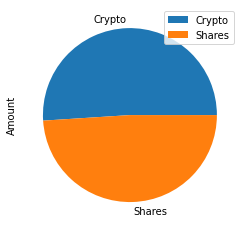

In [56]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True)
# YOUR CODE HERE!

In [57]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3 
savings= df_savings['Amount'].sum()

saving_amount = (emergency_fund - savings)

# Calculate total amount of savings

if savings>emergency_fund:
    print(f"Congratulations on reaching your financial goals")
elif savings < emergency_fund:
    print(f"you need to save {saving_amount} to reach your goals")
else:
    print(f"You need to save  to reach your goal")

# YOUR CODE HERE!

# Validate saving health
# YOUR CODE HERE!

Congratulations on reaching your financial goals


In [58]:
if savings==emergency_fund:
    print(f"Congratulations on reaching your financial goals")
elif savings > emergency_fund:
    print(f"Congratulations on having enough money in this fund")
else:
    print(f"You nee dto save")

Congratulations on having enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [59]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [60]:
# Get 5 years' worth of historical data for SPY and AGG

timeframe = "1Day"
# YOUR CODE HERE!
start_date = pd.Timestamp("2016-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-05-01", tz="America/New_York").isoformat()

#set Tickers

tickers = ["SPY", "AGG"]

df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df



# Reorganize the DataFrame
# Separate ticker data

SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)



df_ticker = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])
# YOUR CODE HERE!


# Concatenate the ticker DataFrames
# YOUR CODE HERE!

# Display sample data
df_ticker.head()
df_ticker.tail()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2022-04-25 04:00:00+00:00  423.70  428.69  418.84  428.51  119103454   
2022-04-26 04:00:00+00:00  425.92  426.04  416.07  416.10  101074178   
2022-04-27 04:00:00+00:00  417.38  422.92  415.01  417.20  120771109   
2022-04-28 04:00:00+00:00  422.17  429.64  417.60  427.81  104665724   
2022-04-29 04:00:00+00:00  423.56  425.87  411.21  412.00  145242451   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2022-04-25 04:00:00+00:00     1139830  423.952513  103.47  103.93  103.470   
2022-04-26 04:00:00+00:00     1001090  420.127020  104.13  104.13  103.800   
2022-04-27 04:00:00+00:00     1005154  418.848698  103.94  104.01  103.530   
2022-04-28 04:00:00+00:00      801719  424.039318  103.33  103.51  103.165   
2022-04-29 04:00:00+00:00     1143618  416.879474  102.92  103.27  102.820   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-04-25 04:00:00+00:00  103.63   8768318       31373  103.691097  
2022-04-26 04:00:00+00:00  103.95   8533802       30915  103.960003  
2022-04-27 04:00:00+00:00  103.53  11102819       39392  103.679752  
2022-04-28 04:00:00+00:00  103.49   9901783       32976  103.361421  
2022-04-29 04:00:00+00:00  102.87   9922012       33928  103.003420

In [61]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 1000,
    num_trading_days = 252*30
)

In [62]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head() 

# YOUR CODE HERE!

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.009133  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005676  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000049  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.61  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.81  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.86  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.14  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.97  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001808  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [63]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirtyyear.calc_cumulative_return() 
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\ganes\Desktop\Bootcamp\Working_Files\Public\Assignments\assignment_5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994778,0.992931,0.998270,1.003441,1.003228,1.010171,0.999018,1.003315,0.994639,0.980395,...,1.003205,0.999135,0.998237,1.005542,0.995245,0.997664,0.999453,0.990121,1.000844,1.008872
2,0.993482,0.994849,0.985437,1.003799,1.014724,1.007539,0.983169,1.001583,1.006060,0.970073,...,1.004162,0.992756,1.007127,0.997455,0.997924,0.985661,1.000256,0.994565,1.009256,1.008500
3,0.990798,1.004190,0.987153,1.000254,1.007697,1.006584,0.991374,1.003264,1.010106,0.975936,...,1.006526,0.983649,1.001666,0.996950,1.011230,0.993377,1.001170,0.986403,1.012235,1.018444
4,1.000924,1.007705,0.980329,1.008741,1.010251,1.006614,0.996648,1.001228,1.009909,0.982141,...,1.010909,0.992830,1.001582,1.000056,1.023988,0.991867,0.997024,1.001082,1.014787,1.014382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.831769,8.862156,3.836443,8.209669,7.648175,6.986021,5.585053,5.446452,5.965496,6.399544,...,12.191588,3.776585,13.937200,8.713600,6.972555,10.885378,2.822178,14.444394,10.891148,6.721691
7557,5.755047,9.020908,3.876686,8.167958,7.468381,7.058773,5.595841,5.423360,5.976287,6.359374,...,12.214258,3.745412,13.891348,8.752661,6.963999,10.848409,2.834035,14.539333,10.852628,6.810308
7558,5.706482,8.879983,3.875663,8.199224,7.438196,7.085520,5.576694,5.397576,5.948099,6.375290,...,12.288482,3.770920,13.906263,8.820249,6.974263,10.909316,2.807678,14.651224,10.808380,6.827145
7559,5.705028,8.970533,3.846746,8.222440,7.344883,7.101724,5.585819,5.390302,6.021541,6.342817,...,12.352514,3.798367,13.903073,8.845652,6.963270,10.982663,2.820220,14.744668,10.891778,6.829152


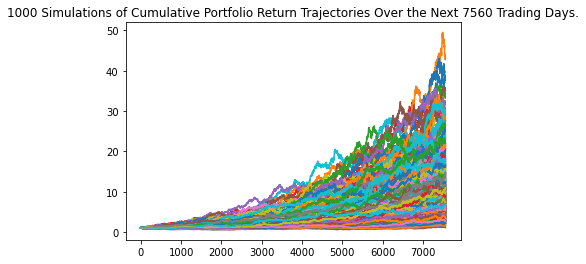

In [64]:
# Plot simulation outcomes

line_plot = MC_thirtyyear.plot_simulation()
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight") 
# YOUR CODE HERE!

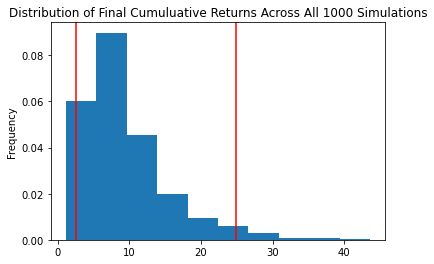

In [65]:
# Plot probability distribution and confidence intervals

dist_plot = MC_thirtyyear.plot_distribution()
dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight') 
# YOUR CODE HERE!

### Retirement Analysis

In [66]:
# Fetch summary statistics from the Monte Carlo simulation results

table = MC_thirtyyear.summarize_cumulative_return()
# YOUR CODE HERE!
print(table)
# Print summary statistics
# YOUR CODE HERE!

count           1000.000000
mean               9.384731
std                5.899961
min                1.096651
25%                5.274149
50%                8.108425
75%               11.732757
max               43.649101
95% CI Lower       2.462619
95% CI Upper      24.917231
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [67]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(table[8]*20000,2)
ci_upper = round(table[9]*20000,2)
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $49252.39 and $498344.62


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [68]:
# Set initial investment
initial_investment2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower = round(table[8]*initial_investment2,2)
ci_upper = round(table[9]*initial_investment2,2)
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $73878.58 and $747516.93


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [69]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [70]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [71]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [72]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [73]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [74]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")